In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'wn_340_500',
                          'P_50_T_250',
                          'min_1e-23_max_1e-18_ng_7',
                          'wgt_.2_.2_.2_.2_.2_.2_.2',
                          'dgs',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'wn_340_500',
                               'P_50_T_250',
                               'min_1e-23_max_1e-18_ng_7',
                               'wgt_.2_.2_.2_.2_.2_.2_.2',
                               'dgs',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7, ]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
fig.display_hrefanchor()

In [11]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [12]:
table_dgdgs.display_hrefanchor()

In [13]:
for g in [1, 2, 3, 4, 5, 6, 7,]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

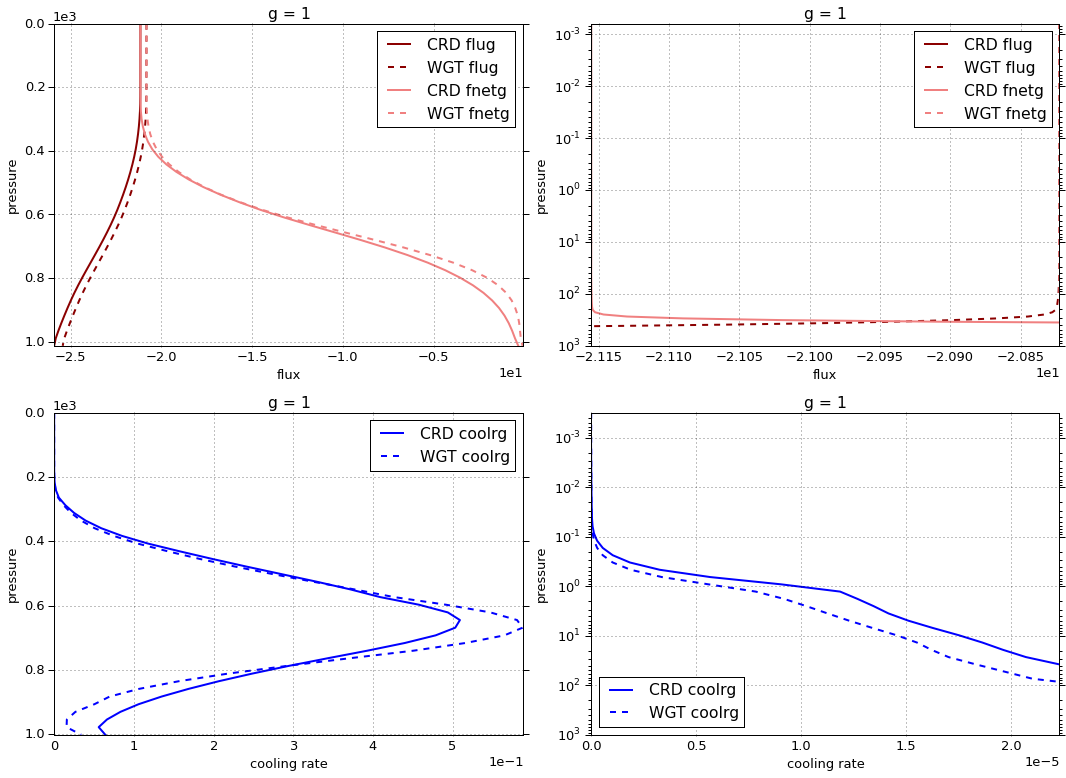

# Figure: flux, cooling rate. g-group 2

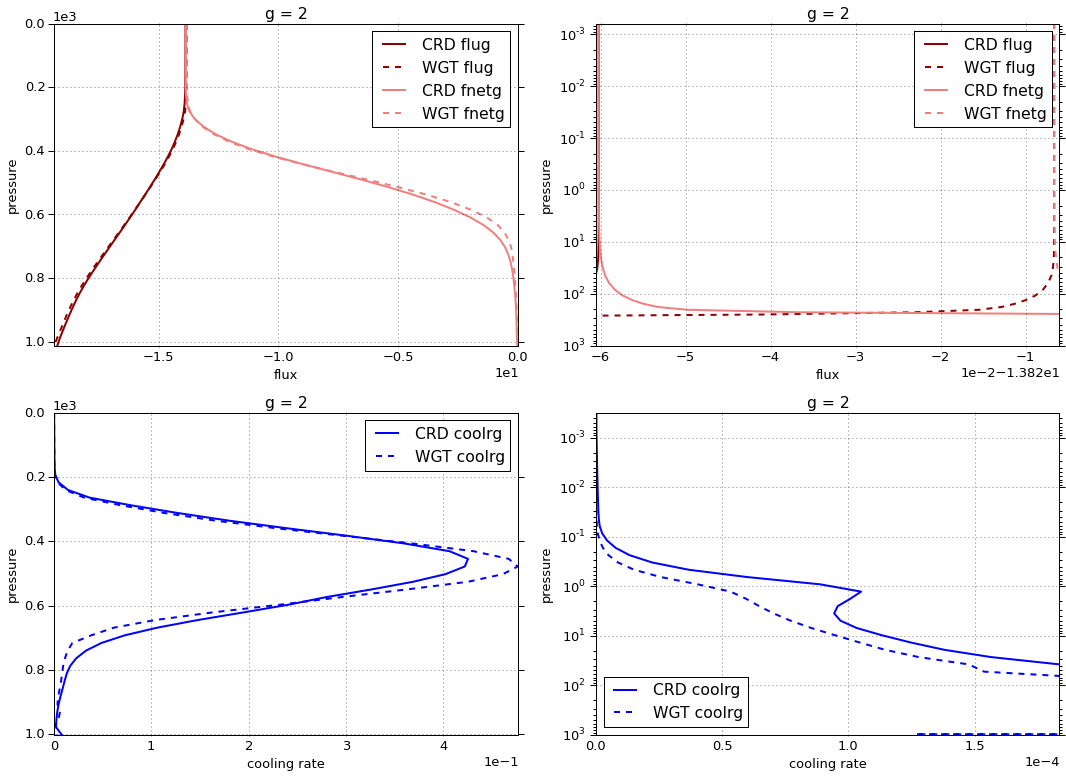

# Figure: flux, cooling rate. g-group 3

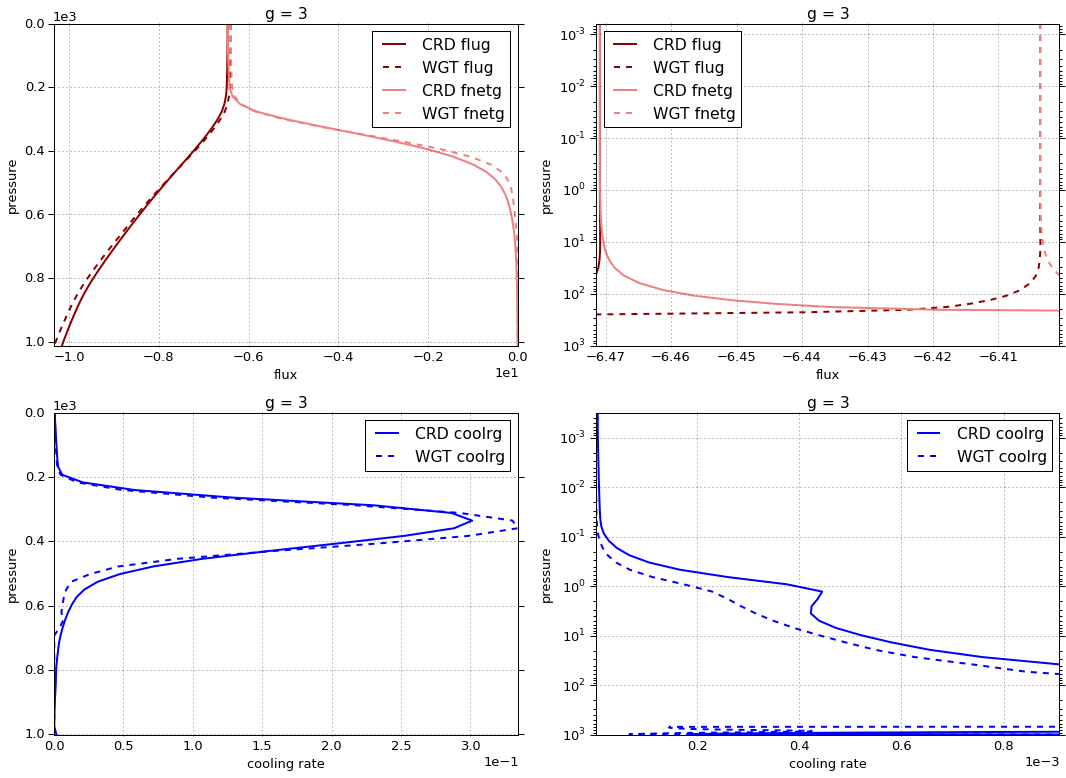

# Figure: flux, cooling rate. g-group 4

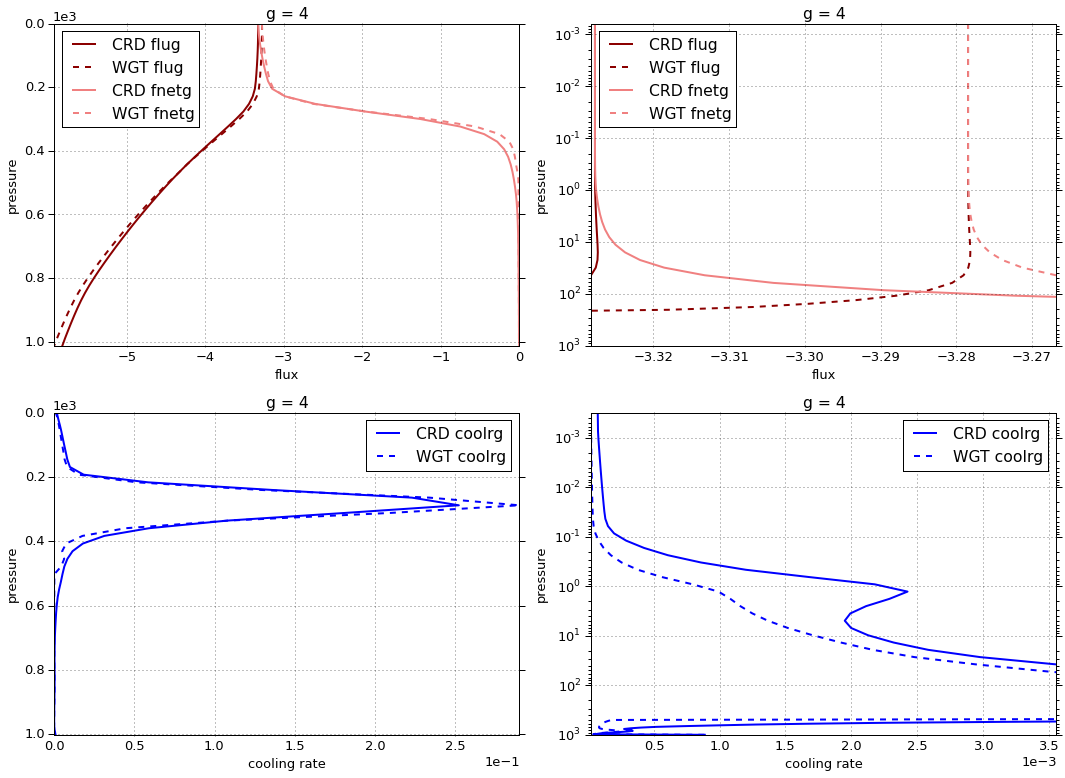

# Figure: flux, cooling rate. g-group 5

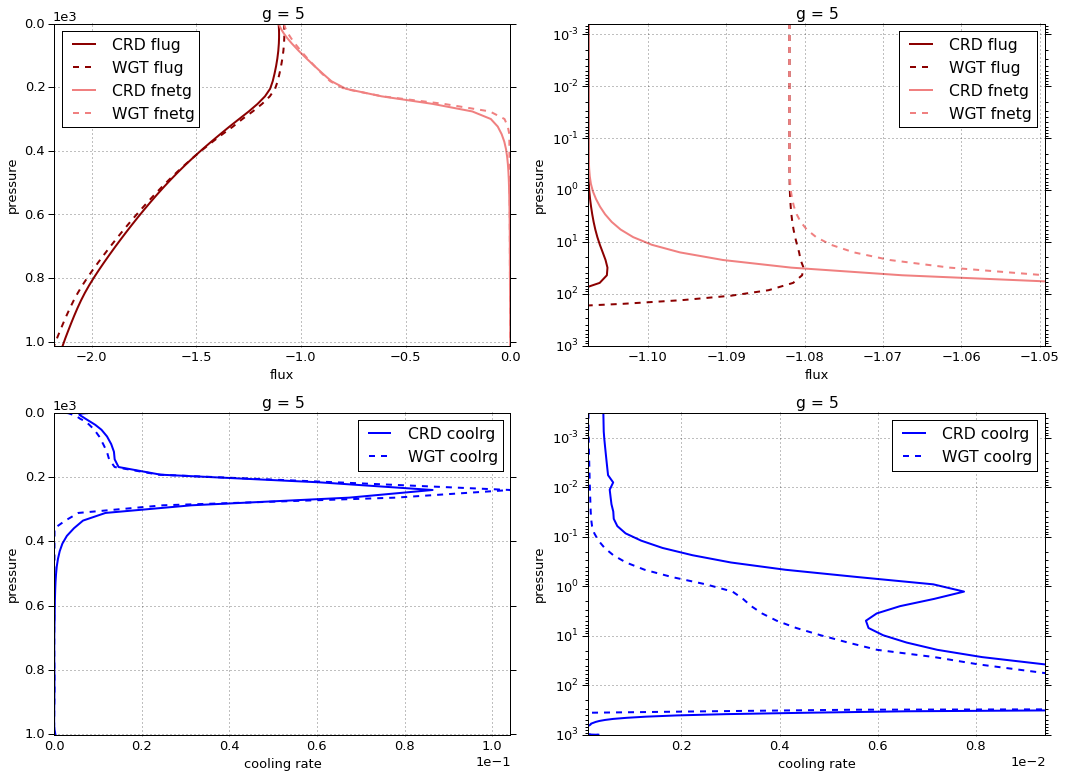

# Figure: flux, cooling rate. g-group 6

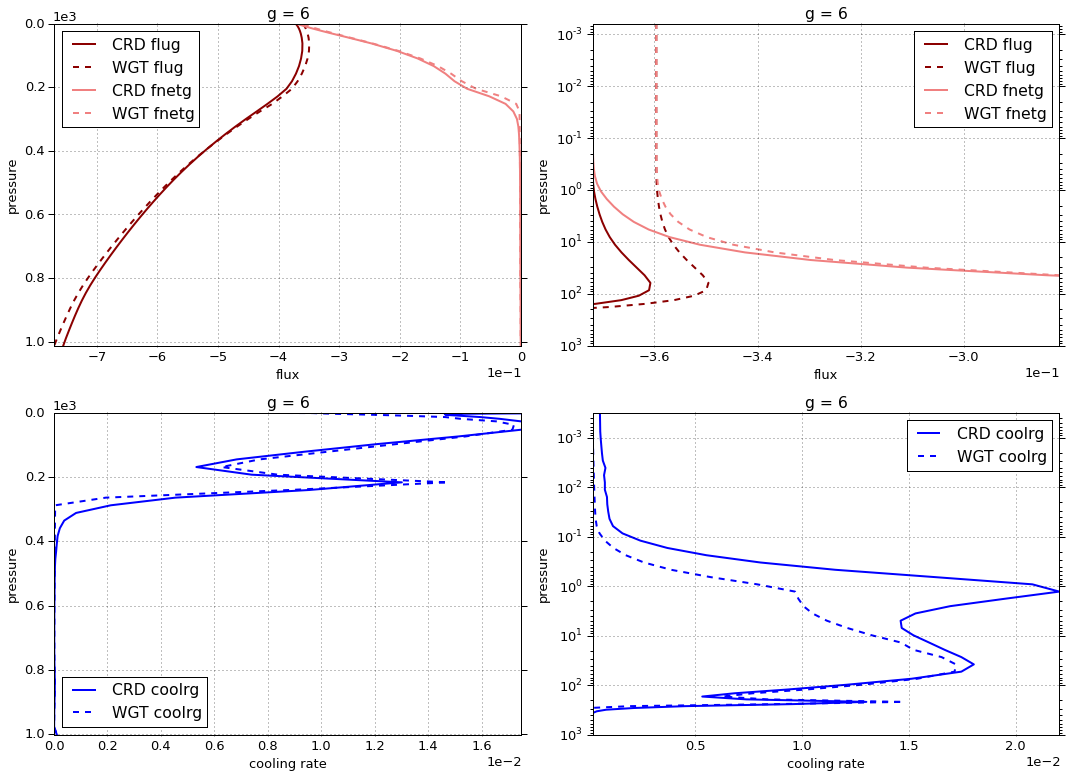

# Figure: flux, cooling rate. g-group 7

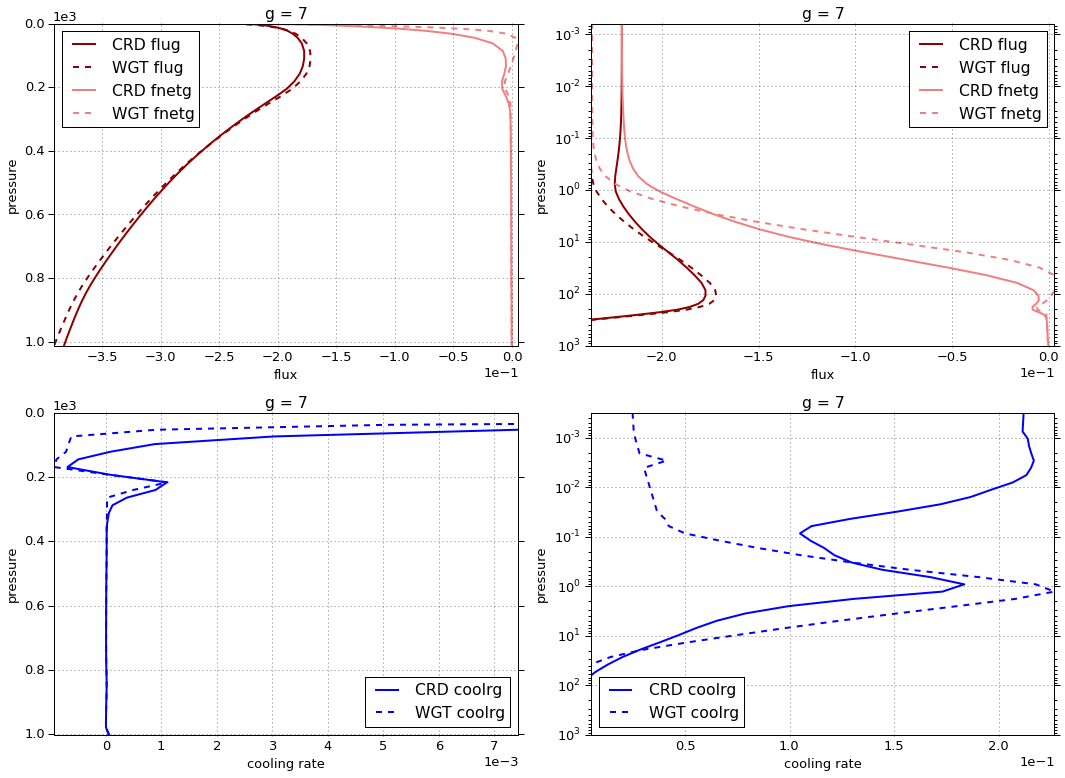

# Figure: flux, cooling rate. g-group total

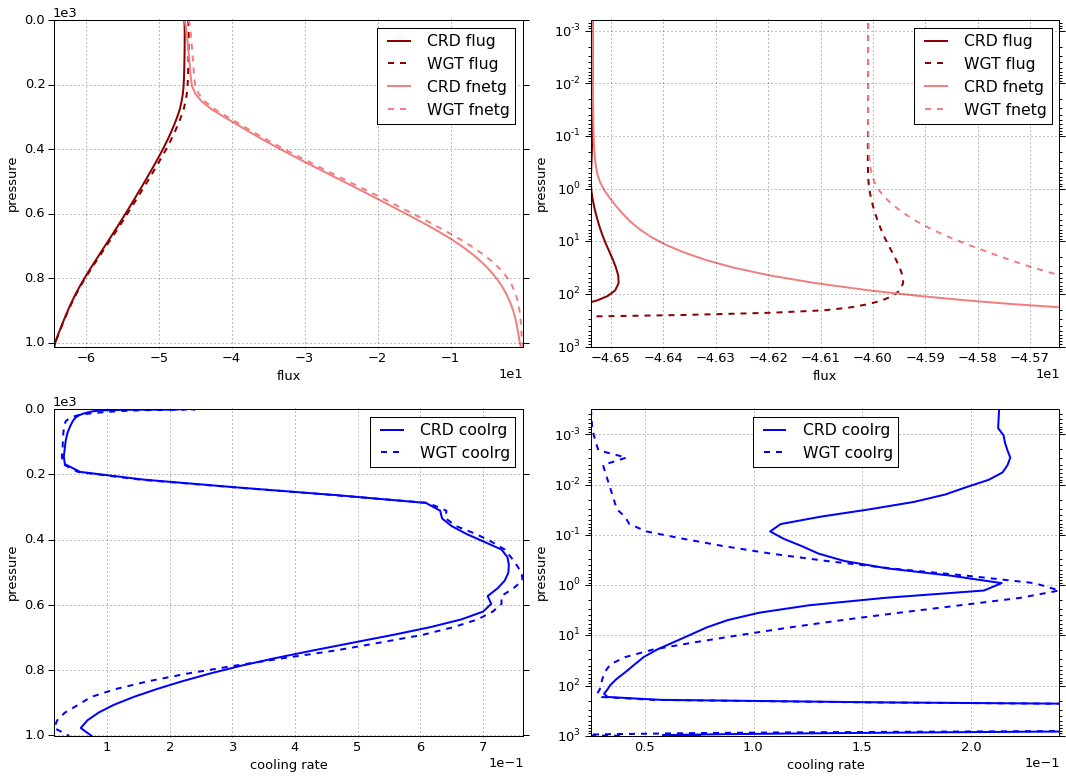

In [14]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0        1     -21.155549   0.000000 -21.155549
  1013     76    -25.906104  25.564201  -0.341904
2 0        1     -13.880212   0.000000 -13.880212
  1013     76    -19.232012  19.210535  -0.021477
3 0        1      -6.470885   0.000000  -6.470885
  1013     76    -10.163681  10.158791  -0.004890
4 0        1      -3.327723   0.000000  -3.327723
  1013     76     -5.821393   5.818946  -0.002447
5 0        1      -1.107605   0.000000  -1.107605
  1013     76     -2.138327   2.137484  -0.000844
6 0        1      -0.371951   0.000000  -0.371951
  1013     76     -0.755596   0.755299  -0.000298
7 0        1      -0.220805   0.000000  -0.220805
  1013     76     -0.382763   0.382613  -0.000150


WGT


flug       fldg      fnetg
g pressure level                                 
1 0        1     -20.822521   0.000000 -20.822521
  1013     76    -25.435499  25.328667  -0.106831
2 0        1     -13.826644   0.000000 -13.826644
  1013     76    -19.361888  19.353898  -0.007990
3 0        1      -6.403630   0.000000  -6.403630
  1013     76    -10.336529  10.332263  -0.004266
4 0        1      -3.278463   0.000000  -3.278463
  1013     76     -5.925385   5.922940  -0.002445
5 0        1      -1.081950   0.000000  -1.081950
  1013     76     -2.178905   2.178005  -0.000899
6 0        1      -0.359629   0.000000  -0.359629
  1013     76     -0.770517   0.770199  -0.000318
7 0        1      -0.236291   0.000000  -0.236291
  1013     76     -0.391154   0.390993  -0.000161


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.333028  0.000000  0.333028
  1013     76     0.470605 -0.235534  0.235072
2 0        1      0.053568  0.000000  0.053568
  1013     76    -0.129876  0.143363  0.013487
3 0        1      0.067255  0.000000  0.067255
  1013     76    -0.172848  0.173472  0.000624
4 0        1      0.049260  0.000000  0.049260
  1013     76    -0.103993  0.103994  0.000001
5 0        1      0.025655  0.000000  0.025655
  1013     76    -0.040577  0.040522 -0.000056
6 0        1      0.012322  0.000000  0.012322
  1013     76    -0.014921  0.014900 -0.000020
7 0        1     -0.015487  0.000000 -0.015487
  1013     76    -0.008392  0.008380 -0.000012

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -9.654554e-09
  1001.112500 75     6.428501e-02
2 0.000312    1      4.246323e-07
  1001.112500 75     7.972587e-03
3 0.000312    1      5.163937e-06
  1001.112500 75     1.778208e-03
4 0.000312    1      7.359259e-05
  1001.112500 75     8.868289e-04
5 0.000312    1      4.085460e-04
  1001.112500 75     3.047596e-04
6 0.000312    1      5.301351e-04
  1001.112500 75     1.074902e-04
7 0.000312    1      2.118663e-01
  1001.112500 75     5.416370e-05


WGT


coolrg
g pressure    layer              
1 0.000312    1      1.392946e-09
  1001.112500 75     3.401334e-02
2 0.000312    1      1.699634e-07
  1001.112500 75     2.886069e-03
3 0.000312    1      1.411126e-06
  1001.112500 75     1.540755e-03
4 0.000312    1      2.220929e-05
  1001.112500 75     8.832336e-04
5 0.000312    1      1.048637e-04
  1001.112500 75     3.247859e-04
6 0.000312    1      1.890096e-04
  1001.112500 75     1.148527e-04
7 0.000312    1      2.495111e-02
  1001.112500 75     5.830515e-05


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.104750e-08
  1001.112500 75    -3.027167e-02
2 0.000312    1     -2.546689e-07
  1001.112500 75    -5.086518e-03
3 0.000312    1     -3.752812e-06
  1001.112500 75    -2.374525e-04
4 0.000312    1     -5.138330e-05
  1001.112500 75    -3.595340e-06
5 0.000312    1     -3.036823e-04
  1001.112500 75     2.002632e-05
6 0.000312    1     -3.411254e-04
  1001.112500 75     7.362510e-06
7 0.000312    1     -1.869152e-01
  1001.112500 75     4.141449e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-46.534729,0.000000,-46.534729
1013,76,-64.399876,64.027869,-0.372008



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-46.009127,0.000000,-46.009127
1013,76,-64.399877,64.276965,-0.122911



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,0.525602,0.000000,0.525602
1013,76,-0.000001,0.249097,0.249097


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.212884
1001.112500,75,0.075389



WGT


,,coolrg
pressure,layer,
0.000312,1,0.025269
1001.112500,75,0.039821



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.187615
1001.112500,75,-0.035568


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.385906,0.394962
2,0.302563,0.300651
3,0.164219,0.160505
4,0.094094,0.092009
5,0.034688,0.033834
6,0.012281,0.011965
7,0.006250,0.006074


In [17]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -21.155549  0.000000e+00 -21.155549   1     1   
0.000624      1     2 -21.155549  1.092139e-11 -21.155549   1     2   
0.000876      1     3 -21.155549  1.539570e-11 -21.155549   1     3   
0.001229      1     4 -21.155549  2.183370e-11 -21.155549   1     4   
0.001723      1     5 -21.155549  3.112683e-11 -21.155549   1     5   
0.002417      1     6 -21.155549  4.455121e-11 -21.155549   1     6   
0.003391      1     7 -21.155549  6.398306e-11 -21.155549   1     7   
0.004757      1     8 -21.155549  9.218714e-11 -21.155549   1     8   
0.006672      1     9 -21.155549  1.332441e-10 -21.155549   1     9   
0.009359      1    10 -21.155549  1.932782e-10 -21.155549   1    10   
0.013128      1    11 -21.155549  2.815632e-10 -21.155549   1    11   
0.018415      1    12 -21.155549  4.123824e-10 -21.155549   1    12   
0.025830      1    13 -21.155549  6.081558e-10 -21.155549   1    13   
0.036232      1    14 -21.155549  9.049192e-10 -21.155549   1    14   
0.050823      1    15 -21.155549  1.364118e-09 -21.155549   1    15   
0.071291      1    16 -21.155549  2.124292e-09 -21.155549   1    16   
0.100000      1    17 -21.155549  3.555278e-09 -21.155549   1    17   
0.140271      1    18 -21.155549  6.514280e-09 -21.155549   1    18   
0.196760      1    19 -21.155549  1.280593e-08 -21.155549   1    19   
0.275997      1    20 -21.155549  2.639432e-08 -21.155549   1    20   
0.387100      1    21 -21.155549  5.614462e-08 -21.155549   1    21   
0.543100      1    22 -21.155549  1.222125e-07 -21.155549   1    22   
0.761700      1    23 -21.155549  2.696007e-07 -21.155549   1    23   
1.068500      1    24 -21.155549  5.823546e-07 -21.155549   1    24   
1.498800      1    25 -21.155549  1.147639e-06 -21.155548   1    25   
2.102400      1    26 -21.155549  2.033668e-06 -21.155547   1    26   
2.949000      1    27 -21.155549  3.411195e-06 -21.155546   1    27   
4.136600      1    28 -21.155550  5.598075e-06 -21.155544   1    28   
5.802500      1    29 -21.155550  9.150592e-06 -21.155541   1    29   
8.139200      1    30 -21.155552  1.505338e-05 -21.155536   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -21.240494  2.210209e-01 -21.019473   1    47   
347.300000    1    48 -21.285932  3.777085e-01 -20.908223   1    48   
371.075000    1    49 -21.343135  6.016050e-01 -20.741530   1    49   
394.850000    1    50 -21.413256  9.115572e-01 -20.501699   1    50   
418.625000    1    51 -21.497204  1.326907e+00 -20.170297   1    51   
442.400000    1    52 -21.595629  1.867215e+00 -19.728414   1    52   
466.175000    1    53 -21.706650  2.535834e+00 -19.170816   1    53   
489.950000    1    54 -21.829164  3.336571e+00 -18.492593   1    54   
513.725000    1    55 -21.962852  4.274176e+00 -17.688677   1    55   
537.500000    1    56 -22.107145  5.347916e+00 -16.759230   1    56   
561.275000    1    57 -22.261094  6.549479e+00 -15.711615   1    57   
585.050000    1    58 -22.423210  7.863954e+00 -14.559256   1    58   
608.825000    1    59 -22.600134  9.330665e+00 -13.269469   1    59   
632.600000    1    60 -22.791685  1.091355e+01 -11.878137   1    60   
656.375000    1    61 -22.996039  1.255213e+01 -10.443910   1    61   
680.150000    1    62 -23.211283  1.418507e+01  -9.026208   1    62   
703.925000    1    63 -23.435226  1.575741e+01  -7.677815   1    63   
727.700000    1    64 -23.665492  1.722702e+01  -6.438468   1    64   
751.475000    1    65 -23.899352  1.856860e+01  -5.330754   1    65   
775.250000    1    66 -24.133394  1.976865e+01  -4.364739   1    66   
799.025000    1    67 -24.363307  2.082692e+01  -3.536386   1    67   
822.800000    1    68 -24.584308  2.174798e+01  -2.836322   1    68   
846.575000    1    69 -24.792616  2.

In [18]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      2     1 -13.880212  0.000000e+00 -13.880212   2     1   
0.000624      2     2 -13.880212  2.122683e-10 -13.880212   2     2   
0.000876      2     3 -13.880212  2.988334e-10 -13.880212   2     3   
0.001229      2     4 -13.880212  4.228249e-10 -13.880212   2     4   
0.001723      2     5 -13.880212  6.010448e-10 -13.880212   2     5   
0.002417      2     6 -13.880212  8.572764e-10 -13.880212   2     6   
0.003391      2     7 -13.880212  1.225915e-09 -13.880212   2     7   
0.004757      2     8 -13.880212  1.756651e-09 -13.880212   2     8   
0.006672      2     9 -13.880212  2.521427e-09 -13.880212   2     9   
0.009359      2    10 -13.880212  3.624872e-09 -13.880212   2    10   
0.013128      2    11 -13.880212  5.219662e-09 -13.880212   2    11   
0.018415      2    12 -13.880212  7.529965e-09 -13.880212   2    12   
0.025830      2    13 -13.880212  1.088732e-08 -13.880212   2    13   
0.036232      2    14 -13.880212  1.578753e-08 -13.880212   2    14   
0.050823      2    15 -13.880212  2.301326e-08 -13.880212   2    15   
0.071291      2    16 -13.880212  3.429378e-08 -13.880212   2    16   
0.100000      2    17 -13.880212  5.424878e-08 -13.880212   2    17   
0.140271      2    18 -13.880212  9.314724e-08 -13.880212   2    18   
0.196760      2    19 -13.880212  1.712915e-07 -13.880212   2    19   
0.275997      2    20 -13.880212  3.310815e-07 -13.880212   2    20   
0.387100      2    21 -13.880213  6.627067e-07 -13.880212   2    21   
0.543100      2    22 -13.880213  1.360611e-06 -13.880211   2    22   
0.761700      2    23 -13.880212  2.833074e-06 -13.880210   2    23   
1.068500      2    24 -13.880212  5.748987e-06 -13.880206   2    24   
1.498800      2    25 -13.880212  1.049098e-05 -13.880201   2    25   
2.102400      2    26 -13.880211  1.701370e-05 -13.880194   2    26   
2.949000      2    27 -13.880210  2.601178e-05 -13.880184   2    27   
4.136600      2    28 -13.880210  3.901918e-05 -13.880171   2    28   
5.802500      2    29 -13.880211  5.878682e-05 -13.880152   2    29   
8.139200      2    30 -13.880213  9.020747e-05 -13.880123   2    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    2    47 -14.097593  9.642226e-01 -13.133371   2    47   
347.300000    2    48 -14.199877  1.571391e+00 -12.628486   2    48   
371.075000    2    49 -14.320901  2.366622e+00 -11.954280   2    49   
394.850000    2    50 -14.460148  3.356949e+00 -11.103199   2    50   
418.625000    2    51 -14.616577  4.528825e+00 -10.087752   2    51   
442.400000    2    52 -14.788983  5.845996e+00  -8.942987   2    52   
466.175000    2    53 -14.972355  7.227766e+00  -7.744589   2    53   
489.950000    2    54 -15.163586  8.608231e+00  -6.555355   2    54   
513.725000    2    55 -15.361294  9.939227e+00  -5.422068   2    55   
537.500000    2    56 -15.564034  1.118117e+01  -4.382864   2    56   
561.275000    2    57 -15.769878  1.230599e+01  -3.463891   2    57   
585.050000    2    58 -15.975570  1.329985e+01  -2.675719   2    58   
608.825000    2    59 -16.186928  1.418946e+01  -1.997467   2    59   
632.600000    2    60 -16.403086  1.495439e+01  -1.448697   2    60   
656.375000    2    61 -16.622140  1.558931e+01  -1.032828   2    61   
680.150000    2    62 -16.842580  1.610801e+01  -0.734569   2    62   
703.925000    2    63 -17.063029  1.653307e+01  -0.529955   2    63   
727.700000    2    64 -17.282220  1.688936e+01  -0.392864   2    64   
751.475000    2    65 -17.498717  1.719825e+01  -0.300466   2    65   
775.250000    2    66 -17.710850  1.747448e+01  -0.236373   2    66   
799.025000    2    67 -17.915836  1.772619e+01  -0.189642   2    67   
822.800000    2    68 -18.109623  1.795671e+01  -0.152912   2    68   
846.575000    2    69 -18.288476  1.

In [19]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                          wgt                   \
              g level       flug          fldg     fnetg   g level       flug   
pressure                                                                        
0.000000      3     1  -6.470885  0.000000e+00 -6.470885   3     1  -6.403630   
0.000624      3     2  -6.470885  1.032716e-09 -6.470885   3     2  -6.403630   
0.000876      3     3  -6.470885  1.453314e-09 -6.470885   3     3  -6.403630   
0.001229      3     4  -6.470885  2.054393e-09 -6.470885   3     4  -6.403630   
0.001723      3     5  -6.470885  2.916149e-09 -6.470885   3     5  -6.403630   
0.002417      3     6  -6.470885  4.151974e-09 -6.470885   3     6  -6.403630   
0.003391      3     7  -6.470885  5.925247e-09 -6.470885   3     7  -6.403630   
0.004757      3     8  -6.470885  8.471303e-09 -6.470885   3     8  -6.403630   
0.006672      3     9  -6.470885  1.212962e-08 -6.470885   3     9  -6.403630   
0.009359      3    10  -6.470885  1.739193e-08 -6.470885   3    10  -6.403630   
0.013128      3    11  -6.470885  2.497247e-08 -6.470885   3    11  -6.403630   
0.018415      3    12  -6.470885  3.591429e-08 -6.470885   3    12  -6.403630   
0.025830      3    13  -6.470885  5.175034e-08 -6.470885   3    13  -6.403630   
0.036232      3    14  -6.470885  7.475601e-08 -6.470885   3    14  -6.403630   
0.050823      3    15  -6.470885  1.084888e-07 -6.470885   3    15  -6.403630   
0.071291      3    16  -6.470885  1.606016e-07 -6.470885   3    16  -6.403630   
0.100000      3    17  -6.470885  2.509510e-07 -6.470885   3    17  -6.403630   
0.140271      3    18  -6.470885  4.226369e-07 -6.470885   3    18  -6.403630   
0.196760      3    19  -6.470885  7.588905e-07 -6.470884   3    19  -6.403630   
0.275997      3    20  -6.470885  1.429535e-06 -6.470884   3    20  -6.403630   
0.387100      3    21  -6.470885  2.787957e-06 -6.470882   3    21  -6.403629   
0.543100      3    22  -6.470885  5.580997e-06 -6.470879   3    22  -6.403629   
0.761700      3    23  -6.470884  1.134875e-05 -6.470872   3    23  -6.403629   
1.068500      3    24  -6.470881  2.261309e-05 -6.470859   3    24  -6.403627   
1.498800      3    25  -6.470877  4.102124e-05 -6.470836   3    25  -6.403625   
2.102400      3    26  -6.470872  6.678491e-05 -6.470805   3    26  -6.403621   
2.949000      3    27  -6.470865  1.028219e-04 -6.470762   3    27  -6.403616   
4.136600      3    28  -6.470858  1.552498e-04 -6.470703   3    28  -6.403610   
5.802500      3    29  -6.470851  2.348928e-04 -6.470616   3    29  -6.403603   
8.139200      3    30  -6.470846  3.608298e-04 -6.470486   3    30  -6.403598   
...          ..   ...        ...           ...       ...  ..   ...        ...   
323.525000    3    47  -6.799595  2.419977e+00 -4.379618   3    47  -6.742772   
347.300000    3    48  -6.922739  3.391582e+00 -3.531157   3    48  -6.873755   
371.075000    3    49  -7.056102  4.336735e+00 -2.719367   3    49  -7.016326   
394.850000    3    50  -7.196982  5.188114e+00 -2.008869   3    50  -7.167186   
418.625000    3    51  -7.342768  5.907902e+00 -1.434866   3    51  -7.323793   
442.400000    3    52  -7.491663  6.489090e+00 -1.002573   3    52  -7.483710   
466.175000    3    53  -7.640185  6.938192e+00 -0.701992   3    53  -7.643138   
489.950000    3    54  -7.786659  7.285730e+00 -0.500929   3    54  -7.800464   
513.725000    3    55  -7.930722  7.562678e+00 -0.368044   3    55  -7.954893   
537.500000    3    56  -8.072109  7.792524e+00 -0.279584   3    56  -8.106700   
561.275000    3    57  -8.210677  7.992728e+00 -0.217949   3    57  -8.255378   
585.050000    3    58  -8.345899  8.173562e+00 -0.172337   3    58  -8.400000   
608.825000    3    59  -8.479097  8.342730e+00 -0.136367   3    59  -8.542234   
632.600000    3    60  -8.610168  8.502162e+00 -0.108006   3    60  -8.679987   
656.375000    3    61  -8.738857  8.653196e+00 -0.085662   3    61  -8.810416   
680.150000    3    62  -8.865394  8.797132e

In [20]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -3.327723  0.000000e+00 -3.327723   4     1 -3.278463   
0.000624      4     2 -3.327723  1.257302e-08 -3.327723   4     2 -3.278463   
0.000876      4     3 -3.327723  1.768943e-08 -3.327723   4     3 -3.278463   
0.001229      4     4 -3.327723  2.499260e-08 -3.327723   4     4 -3.278463   
0.001723      4     5 -3.327723  3.544817e-08 -3.327723   4     5 -3.278463   
0.002417      4     6 -3.327723  5.041657e-08 -3.327723   4     6 -3.278463   
0.003391      4     7 -3.327723  7.184973e-08 -3.327723   4     7 -3.278463   
0.004757      4     8 -3.327723  1.025442e-07 -3.327723   4     8 -3.278463   
0.006672      4     9 -3.327723  1.465063e-07 -3.327723   4     9 -3.278463   
0.009359      4    10 -3.327723  2.094879e-07 -3.327723   4    10 -3.278463   
0.013128      4    11 -3.327723  2.997470e-07 -3.327723   4    11 -3.278463   
0.018415      4    12 -3.327723  4.291611e-07 -3.327723   4    12 -3.278463   
0.025830      4    13 -3.327723  6.148401e-07 -3.327723   4    13 -3.278463   
0.036232      4    14 -3.327723  8.815272e-07 -3.327722   4    14 -3.278463   
0.050823      4    15 -3.327724  1.266746e-06 -3.327722   4    15 -3.278463   
0.071291      4    16 -3.327724  1.848188e-06 -3.327722   4    16 -3.278463   
0.100000      4    17 -3.327724  2.815420e-06 -3.327721   4    17 -3.278463   
0.140271      4    18 -3.327724  4.540822e-06 -3.327720   4    18 -3.278463   
0.196760      4    19 -3.327725  7.663106e-06 -3.327717   4    19 -3.278463   
0.275997      4    20 -3.327725  1.334114e-05 -3.327711   4    20 -3.278462   
0.387100      4    21 -3.327724  2.372127e-05 -3.327700   4    21 -3.278462   
0.543100      4    22 -3.327721  4.285460e-05 -3.327678   4    22 -3.278461   
0.761700      4    23 -3.327713  7.818158e-05 -3.327634   4    23 -3.278457   
1.068500      4    24 -3.327696  1.406816e-04 -3.327555   4    24 -3.278450   
1.498800      4    25 -3.327668  2.368869e-04 -3.327432   4    25 -3.278436   
2.102400      4    26 -3.327634  3.661827e-04 -3.327268   4    26 -3.278417   
2.949000      4    27 -3.327594  5.377757e-04 -3.327056   4    27 -3.278390   
4.136600      4    28 -3.327547  7.718511e-04 -3.326776   4    28 -3.278355   
5.802500      4    29 -3.327495  1.104407e-03 -3.326391   4    29 -3.278310   
8.139200      4    30 -3.327438  1.600121e-03 -3.325838   4    30 -3.278256   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -3.711458  2.959282e+00 -0.752177   4    47 -3.676904   
347.300000    4    48 -3.817230  3.369124e+00 -0.448106   4    48 -3.789756   
371.075000    4    49 -3.923603  3.641736e+00 -0.281867   4    49 -3.903247   
394.850000    4    50 -4.029009  3.835287e+00 -0.193722   4    50 -4.015814   
418.625000    4    51 -4.132226  3.988970e+00 -0.143257   4    51 -4.125952   
442.400000    4    52 -4.232693  4.121818e+00 -0.110876   4    52 -4.233098   
466.175000    4    53 -4.329508  4.241987e+00 -0.087521   4    53 -4.328273   
489.950000    4    54 -4.422383  4.352823e+00 -0.069560   4    54 -4.430275   
513.725000    4    55 -4.511366  4.456527e+00 -0.054839   4    55 -4.527938   
537.500000    4    56 -4.597663  4.554736e+00 -0.042927   4    56 -4.621918   
561.275000    4    57 -4.681931  4.647785e+00 -0.034146   4    57 -4.712737   
585.050000    4    58 -4.763932  4.736122e+00 -0.027810   4    58 -4.800772   
608.825000    4    59 -4.843971  4.820952e+00 -0.023019   4    59 -4.886291   
632.600000    4    60 -4.921961  4.902552e+00 -0.019409   4    60 -4.969496   
656.375000    4    61 -4.998012  4.981405e+00 -0.016607   4    61 -5.050546   
680.150000    4    62 -5.072315  5.057783e+00 -0.014532   4    62 -5.129574   
703.925000    4    63 -5.144928  5.131856e+00 -0.013072   4   

In [21]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -1.107605  0.000000e+00 -1.107605   5     1 -1.081950   
0.000624      5     2 -1.107605  5.271235e-08 -1.107605   5     2 -1.081950   
0.000876      5     3 -1.107605  7.412499e-08 -1.107605   5     3 -1.081950   
0.001229      5     4 -1.107605  1.045877e-07 -1.107605   5     4 -1.081950   
0.001723      5     5 -1.107605  1.480416e-07 -1.107605   5     5 -1.081950   
0.002417      5     6 -1.107605  2.100244e-07 -1.107605   5     6 -1.081950   
0.003391      5     7 -1.107605  2.984516e-07 -1.107605   5     7 -1.081950   
0.004757      5     8 -1.107605  4.246181e-07 -1.107605   5     8 -1.081950   
0.006672      5     9 -1.107605  6.046364e-07 -1.107604   5     9 -1.081950   
0.009359      5    10 -1.107605  8.615333e-07 -1.107604   5    10 -1.081950   
0.013128      5    11 -1.107605  1.228201e-06 -1.107604   5    11 -1.081950   
0.018415      5    12 -1.107605  1.751682e-06 -1.107604   5    12 -1.081950   
0.025830      5    13 -1.107606  2.499293e-06 -1.107603   5    13 -1.081950   
0.036232      5    14 -1.107606  3.567618e-06 -1.107602   5    14 -1.081950   
0.050823      5    15 -1.107606  5.101348e-06 -1.107601   5    15 -1.081950   
0.071291      5    16 -1.107607  7.385644e-06 -1.107600   5    16 -1.081950   
0.100000      5    17 -1.107608  1.107998e-05 -1.107597   5    17 -1.081950   
0.140271      5    18 -1.107608  1.744488e-05 -1.107591   5    18 -1.081950   
0.196760      5    19 -1.107609  2.860588e-05 -1.107580   5    19 -1.081949   
0.275997      5    20 -1.107608  4.835482e-05 -1.107559   5    20 -1.081948   
0.387100      5    21 -1.107603  8.360718e-05 -1.107520   5    21 -1.081946   
0.543100      5    22 -1.107591  1.471948e-04 -1.107444   5    22 -1.081941   
0.761700      5    23 -1.107561  2.620894e-04 -1.107299   5    23 -1.081928   
1.068500      5    24 -1.107500  4.602203e-04 -1.107040   5    24 -1.081903   
1.498800      5    25 -1.107401  7.569838e-04 -1.106644   5    25 -1.081859   
2.102400      5    26 -1.107276  1.143527e-03 -1.106133   5    26 -1.081795   
2.949000      5    27 -1.107127  1.641475e-03 -1.105485   5    27 -1.081708   
4.136600      5    28 -1.106949  2.304892e-03 -1.104644   5    28 -1.081590   
5.802500      5    29 -1.106733  3.226281e-03 -1.103507   5    29 -1.081435   
8.139200      5    30 -1.106470  4.572467e-03 -1.101898   5    30 -1.081233   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -1.341674  1.280435e+00 -0.061240   5    47 -1.325178   
347.300000    5    48 -1.385683  1.343024e+00 -0.042659   5    48 -1.374792   
371.075000    5    49 -1.428860  1.398973e+00 -0.029888   5    49 -1.422227   
394.850000    5    50 -1.470835  1.449152e+00 -0.021683   5    50 -1.467601   
418.625000    5    51 -1.511197  1.494868e+00 -0.016329   5    51 -1.510949   
442.400000    5    52 -1.549769  1.537052e+00 -0.012717   5    52 -1.552269   
466.175000    5    53 -1.586565  1.576337e+00 -0.010228   5    53 -1.591609   
489.950000    5    54 -1.621715  1.613203e+00 -0.008512   5    54 -1.629117   
513.725000    5    55 -1.655372  1.648107e+00 -0.007265   5    55 -1.665030   
537.500000    5    56 -1.687820  1.681481e+00 -0.006339   5    56 -1.699589   
561.275000    5    57 -1.719165  1.713542e+00 -0.005624   5    57 -1.732985   
585.050000    5    58 -1.749587  1.744539e+00 -0.005048   5    58 -1.765358   
608.825000    5    59 -1.779155  1.774548e+00 -0.004607   5    59 -1.796805   
632.600000    5    60 -1.807871  1.803681e+00 -0.004190   5    60 -1.827401   
656.375000    5    61 -1.835908  1.832068e+00 -0.003840   5    61 -1.857205   
680.150000    5    62 -1.863268  1.859645e+00 -0.003623   5    62 -1.886266   
703.925000    5    63 -1.889967  1.886497e+00 -0.003470   5   

In [22]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      6     1 -0.371951  0.000000e+00 -0.371951   6     1 -0.359629   
0.000624      6     2 -0.371951  8.769391e-08 -0.371951   6     2 -0.359629   
0.000876      6     3 -0.371951  1.234752e-07 -0.371951   6     3 -0.359629   
0.001229      6     4 -0.371951  1.748461e-07 -0.371951   6     4 -0.359629   
0.001723      6     5 -0.371951  2.488366e-07 -0.371951   6     5 -0.359629   
0.002417      6     6 -0.371952  3.554050e-07 -0.371951   6     6 -0.359629   
0.003391      6     7 -0.371952  5.089265e-07 -0.371951   6     7 -0.359629   
0.004757      6     8 -0.371952  7.301239e-07 -0.371951   6     8 -0.359629   
0.006672      6     9 -0.371952  1.048871e-06 -0.371951   6     9 -0.359629   
0.009359      6    10 -0.371952  1.508331e-06 -0.371951   6    10 -0.359629   
0.013128      6    11 -0.371952  2.170868e-06 -0.371950   6    11 -0.359629   
0.018415      6    12 -0.371953  3.126773e-06 -0.371950   6    12 -0.359629   
0.025830      6    13 -0.371953  4.506981e-06 -0.371949   6    13 -0.359629   
0.036232      6    14 -0.371954  6.502134e-06 -0.371948   6    14 -0.359629   
0.050823      6    15 -0.371955  9.403593e-06 -0.371946   6    15 -0.359629   
0.071291      6    16 -0.371957  1.386377e-05 -0.371943   6    16 -0.359629   
0.100000      6    17 -0.371960  2.163502e-05 -0.371938   6    17 -0.359629   
0.140271      6    18 -0.371963  3.636699e-05 -0.371926   6    18 -0.359629   
0.196760      6    19 -0.371966  6.453577e-05 -0.371902   6    19 -0.359628   
0.275997      6    20 -0.371968  1.181194e-04 -0.371850   6    20 -0.359625   
0.387100      6    21 -0.371963  2.192930e-04 -0.371744   6    21 -0.359617   
0.543100      6    22 -0.371939  4.087031e-04 -0.371531   6    22 -0.359599   
0.761700      6    23 -0.371868  7.563749e-04 -0.371111   6    23 -0.359557   
1.068500      6    24 -0.371705  1.349242e-03 -0.370356   6    24 -0.359472   
1.498800      6    25 -0.371427  2.194940e-03 -0.369232   6    25 -0.359314   
2.102400      6    26 -0.371068  3.227039e-03 -0.367841   6    26 -0.359108   
2.949000      6    27 -0.370633  4.490752e-03 -0.366142   6    27 -0.358830   
4.136600      6    28 -0.370106  6.117786e-03 -0.363989   6    28 -0.358453   
5.802500      6    29 -0.369459  8.354475e-03 -0.361104   6    29 -0.357943   
8.139200      6    30 -0.368647  1.160269e-02 -0.357045   6    30 -0.357247   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    6    47 -0.471360  4.669664e-01 -0.004394   6    47 -0.468617   
347.300000    6    48 -0.487859  4.845377e-01 -0.003321   6    48 -0.486162   
371.075000    6    49 -0.503684  5.009752e-01 -0.002709   6    49 -0.502936   
394.850000    6    50 -0.518831  5.165039e-01 -0.002328   6    50 -0.518982   
418.625000    6    51 -0.533293  5.312583e-01 -0.002035   6    51 -0.534311   
442.400000    6    52 -0.547101  5.452905e-01 -0.001811   6    52 -0.548922   
466.175000    6    53 -0.560266  5.585929e-01 -0.001673   6    53 -0.562834   
489.950000    6    54 -0.572803  5.712265e-01 -0.001577   6    54 -0.576098   
513.725000    6    55 -0.584805  5.833078e-01 -0.001497   6    55 -0.588798   
537.500000    6    56 -0.596343  5.949085e-01 -0.001434   6    56 -0.601018   
561.275000    6    57 -0.607483  6.061067e-01 -0.001376   6    57 -0.612828   
585.050000    6    58 -0.618276  6.169511e-01 -0.001325   6    58 -0.624276   
608.825000    6    59 -0.628757  6.274726e-01 -0.001285   6    59 -0.635397   
632.600000    6    60 -0.638948  6.376981e-01 -0.001250   6    60 -0.646216   
656.375000    6    61 -0.648868  6.476512e-01 -0.001217   6    61 -0.656756   
680.150000    6    62 -0.658536  6.573492e-01 -0.001186   6    62 -0.667032   
703.925000    6    63 -0.667963  6.668058e-01 -0.001157   6   

In [23]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 7

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      7     1 -0.220805  0.000000 -0.220805   7     1 -0.236291   
0.000624      7     2 -0.220811  0.000022 -0.220789   7     2 -0.236294   
0.000876      7     3 -0.220813  0.000031 -0.220783   7     3 -0.236295   
0.001229      7     4 -0.220817  0.000043 -0.220774   7     4 -0.236296   
0.001723      7     5 -0.220822  0.000061 -0.220761   7     5 -0.236298   
0.002417      7     6 -0.220828  0.000085 -0.220743   7     6 -0.236301   
0.003391      7     7 -0.220837  0.000119 -0.220718   7     7 -0.236303   
0.004757      7     8 -0.220850  0.000166 -0.220684   7     8 -0.236308   
0.006672      7     9 -0.220867  0.000232 -0.220635   7     9 -0.236315   
0.009359      7    10 -0.220891  0.000322 -0.220569   7    10 -0.236324   
0.013128      7    11 -0.220926  0.000444 -0.220482   7    11 -0.236338   
0.018415      7    12 -0.220974  0.000609 -0.220365   7    12 -0.236356   
0.025830      7    13 -0.221041  0.000827 -0.220214   7    13 -0.236382   
0.036232      7    14 -0.221138  0.001111 -0.220027   7    14 -0.236418   
0.050823      7    15 -0.221280  0.001476 -0.219804   7    15 -0.236463   
0.071291      7    16 -0.221483  0.001947 -0.219536   7    16 -0.236528   
0.100000      7    17 -0.221762  0.002583 -0.219179   7    17 -0.236613   
0.140271      7    18 -0.222121  0.003467 -0.218654   7    18 -0.236698   
0.196760      7    19 -0.222562  0.004688 -0.217875   7    19 -0.236773   
0.275997      7    20 -0.223088  0.006353 -0.216735   7    20 -0.236803   
0.387100      7    21 -0.223676  0.008647 -0.215028   7    21 -0.236714   
0.543100      7    22 -0.224233  0.011871 -0.212362   7    22 -0.236378   
0.761700      7    23 -0.224485  0.016451 -0.208034   7    23 -0.235552   
1.068500      7    24 -0.223984  0.022618 -0.201366   7    24 -0.233931   
1.498800      7    25 -0.222316  0.029774 -0.192542   7    25 -0.231323   
2.102400      7    26 -0.219982  0.036786 -0.183196   7    26 -0.227976   
2.949000      7    27 -0.217164  0.043944 -0.173220   7    27 -0.224015   
4.136600      7    28 -0.213929  0.051811 -0.162118   7    28 -0.219499   
5.802500      7    29 -0.210286  0.061057 -0.149229   7    29 -0.214477   
8.139200      7    30 -0.206193  0.072297 -0.133896   7    30 -0.208930   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    7    47 -0.239081  0.237966 -0.001115   7    47 -0.237894   
347.300000    7    48 -0.247524  0.246497 -0.001027   7    48 -0.246801   
371.075000    7    49 -0.255583  0.254603 -0.000980   7    49 -0.255316   
394.850000    7    50 -0.263280  0.262344 -0.000936   7    50 -0.263462   
418.625000    7    51 -0.270623  0.269731 -0.000892   7    51 -0.271244   
442.400000    7    52 -0.277614  0.276765 -0.000849   7    52 -0.278661   
466.175000    7    53 -0.284262  0.283455 -0.000808   7    53 -0.285724   
489.950000    7    54 -0.290594  0.289824 -0.000771   7    54 -0.292457   
513.725000    7    55 -0.296651  0.295912 -0.000739   7    55 -0.298904   
537.500000    7    56 -0.302473  0.301762 -0.000712   7    56 -0.305108   
561.275000    7    57 -0.308096  0.307408 -0.000688   7    57 -0.311103   
585.050000    7    58 -0.313541  0.312874 -0.000667   7    58 -0.316915   
608.825000    7    59 -0.318826  0.318179 -0.000648   7    59 -0.322560   
632.600000    7    60 -0.323965  0.323335 -0.000630   7    60 -0.328053   
656.375000    7    61 -0.328968  0.328354 -0.000614   7    61 -0.333403   
680.150000    7    62 -0.333842  0.333244 -0.000598   7    62 -0.338620   
703.925000    7    63 -0.338595  0.338011 -0.000583   7    63 -0.343710   
727.700000    7    64 -0.343230  0.342661 -0.000569   7    64 -0.348677   
751.475000    7    65 -0.347744  0.347191 -0.000553   7    65 -0.353517   
775.250000    7    66 -0.352122  0.35

In [24]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')